# Breast Cancer Detection with Machine Learning

## Introduction

Breast cancer remains one of the most prevalent and concerning health issues globally, with early detection being critical for effective treatment and improved patient outcomes. In this project, we endeavor to harness the power of machine learning, specifically Random Forest, to aid in the accurate and efficient detection of breast cancer. This dataset comprises features computed from digitized images of fine needle aspirates (FNA) of breast masses. These features meticulously describe the characteristics of cell nuclei present in the images, providing valuable insights into the underlying pathology.

With a total of 569 instances and 32 attributes, including an identification marker and a diagnosis label indicating malignancy (M) or benignity (B), this dataset offers a comprehensive representation of breast mass characteristics. Each cell nucleus is characterized by ten real-valued features, encompassing dimensions such as radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension.

Importantly, this dataset benefits from the expertise of esteemed creators, Dr. William H. Wolberg from the General Surgery Department and W. Nick Street, along with Olvi L. Mangasarian from the Computer Sciences Department, all affiliated with the University of Wisconsin. Their collective efforts underscore the meticulous curation of this dataset, providing a solid foundation for our Random Forest-based breast cancer detection project.

Importantly, this project has been developed with the aid of the Udemy course "Machine Learning y Data Science: Curso Completo con Python" by Santiago Hernandez. Leveraging the insights and techniques shared in this comprehensive course, we have gained the necessary skills and knowledge to embark on this endeavor.


Through the application of Random Forest, we aim to develop a robust and accurate predictive model capable of distinguishing between malignant and benign breast masses with high precision and reliability. By leveraging advanced machine learning techniques on this rich dataset, we strive to contribute towards enhancing early detection strategies for breast cancer, ultimately improving patient outcomes and advancing the fight against this formidable disease.

### Imports

In [82]:
import pandas as pd
import matplotlib.patches as mpatches 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import f1_score

### Auxiliar Functions

In [27]:
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [28]:
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

In [29]:
def evaluate_result(y_pred, y, y_prep_pred, y_prep, metric):
    print(metric.__name__, "WITHOUT preparation:", metric(y_pred, y, average='weighted'))
    print(metric.__name__, "WITH preparation:", metric(y_prep_pred, y_prep, average='weighted'))

In [30]:
def transform_column(df, column):
    unique_values = df[column].unique()
    maping = {value: i for i, value in enumerate(unique_values)}
    df[column] = df[column].map(maping)
    return df

### 1. Dataset Load

In [31]:
df = pd.read_csv('breast-cancer-wisconsin-data_data.csv')

### 2. Dataset Visualization

In [32]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [33]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [35]:
print("Dataset length:", len(df))
print("Dataset number of characteristics:", len(df.columns))

Dataset length: 569
Dataset number of characteristics: 33


In [36]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

## 4. Dataset transformation

In [37]:
df = transform_column(df, "diagnosis")

In [38]:
df["diagnosis"]

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [39]:
df = df.drop("id", axis=1)

In [40]:
df = df.drop("Unnamed: 32", axis=1)

In [41]:
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,0,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,0,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,0,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,0,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,0,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


## 5. Dataset Division

In [42]:
train_set, val_set, test_set = train_val_test_split(df)

In [43]:
X_train, y_train = remove_labels(train_set, 'diagnosis')
X_val, y_val = remove_labels(val_set, 'diagnosis')
X_test, y_test = remove_labels(test_set, 'diagnosis')

## 6. Random Forest

In [154]:
from sklearn.ensemble import RandomForestClassifier

# Model training
clf_rnd = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf_rnd.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

#### Train comparison

In [155]:
# Model prediction with train dataset
y_train_pred = clf_rnd.predict(X_train)

In [156]:
# Training comparison
f1_train_score = f1_score(y_train, y_train_pred)

In [157]:
f1_train_score

1.0

#### Val comparison

In [158]:
# Model prediction with val dataset
y_val_pred = clf_rnd.predict(X_val)

In [159]:
# Val comparison
f1_val_score = f1_score(y_val, y_val_pred)

In [160]:
f1_val_score

0.9861111111111112

### Test comparison

In [161]:
# Model prediction with test dataset
y_test_pred = clf_rnd.predict(X_test)

In [162]:
# Test comparison
f1_train_score = f1_score(y_test, y_test_pred)

In [163]:
f1_train_score

0.9806451612903226

## 7. Result visualization

In [164]:
y_test

113    1
118    0
477    1
311    1
83     0
      ..
341    1
46     1
153    1
10     0
410    1
Name: diagnosis, Length: 114, dtype: int64

In [165]:
y_test_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1], dtype=int64)

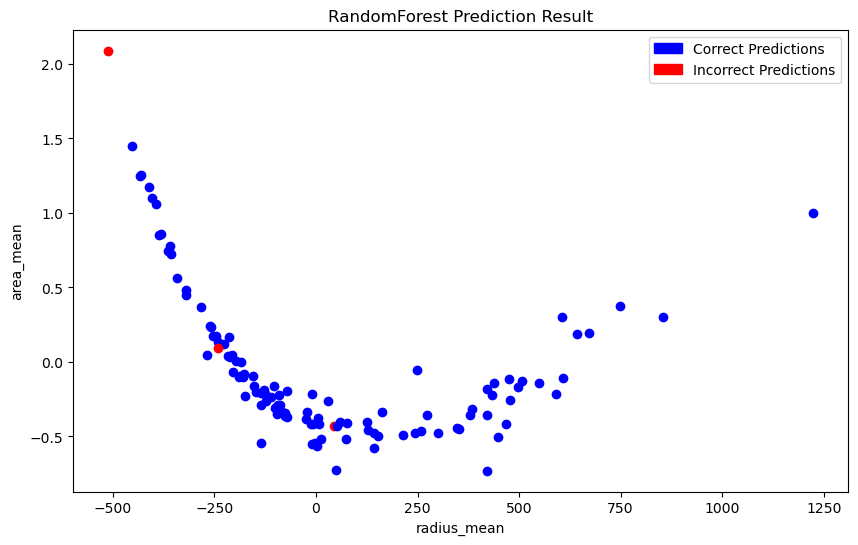

In [166]:
# Select only two characteristics from the DataFrame
characteristics = ['radius_mean', 'area_mean']  

X = df[characteristics]

# PCA model
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Convert y_test to Df
y_test_df = pd.DataFrame(y_test.reset_index(drop=True))

y_test_pred_series = pd.Series(y_test_pred)
y_test_pred_df = pd.DataFrame(y_test_pred_series.reset_index(drop=True))

# Visualize data
plt.figure(figsize=(10, 6))

for i in range(len(y_test_df)):
    if y_test_df.iloc[i, 0] == y_test_pred_df.iloc[i, 0]:
        plt.scatter(X_pca[i, 0], X_pca[i, 1], color='blue')
    else:
        plt.scatter(X_pca[i, 0], X_pca[i, 1], color='red')

plt.xlabel('radius_mean')
plt.ylabel('area_mean')
plt.title('RandomForest Prediction Result')

blue_patch = mpatches.Patch(color='blue', label='Correct Predictions')
red_patch = mpatches.Patch(color='red', label='Incorrect Predictions')

plt.legend(handles=[blue_patch, red_patch], loc='upper right')
plt.show()

## 8. Conclusion

Achieving a 98% precision on the F1 Score with the Random Forest model in our breast cancer detection project is a significant accomplishment and indicates the robustness and efficacy of our approach. This high level of precision suggests that our model is exceptionally accurate in distinguishing between malignant and benign breast masses based on the features extracted from FNA images.

Such a high precision rate is particularly encouraging in the context of medical applications, where accuracy and reliability are paramount. With a precision rate of 98%, our model demonstrates a remarkable ability to minimize false positives, thereby reducing the likelihood of misdiagnosis and unnecessary anxiety or medical interventions for patients.

Furthermore, this exceptional precision underscores the utility of machine learning techniques, specifically Random Forest, in enhancing early detection strategies for breast cancer. By leveraging advanced algorithms and rich datasets, we have developed a predictive model that can aid healthcare professionals in making more informed decisions, potentially leading to earlier diagnoses and improved patient outcomes.